# フィボナッチ数列
---

次のように自身より前の2項を足したものが項となる数列です。  
$0, 1, 1, 2, 3, 5, 8, 13, \cdot\cdot\cdot$

漸化式で表すと次のようになります。  
$F(n) = F(n-1) + F(n-2)$

再帰関数を用いると以下のように表すことが出来ます。

In [1]:
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    
    return fibonacci(n-1) + fibonacci(n-2)

最初の項が0項目で、引数に求めたい項数を入れるとフィボナッチ数列でのその値が返ってきます。

In [2]:
print(f'2項目の値は{fibonacci(2)}')
print(f'13項目の値は{fibonacci(13)}')

2項目の値は1
13項目の値は233


しかしこの関数では計算量が大きいというデメリットがあります。  
例として6項目を求めるときを考えてみると、以下のようになります。

<img src="tree.png">

このツリーグラフを見てみると、n=2は5回、n=3は3回、n=4は2回、重複して呼び出されています。なので、nの数が大きいと計算量が大きくなってしまいます。

# メモ化再帰
---

メモ化再帰では計算したものを配列に保存しておき、計算済みならば再利用をします。これにより、無駄な計算を減らし計算時間を削減することが出来ます。

In [3]:
class Fibonacci_Memo(object):
    def __init__(self):
        # メモ用の辞書
        self.memo = {}
    
    def calc(self, n):
        if n == 0 or n == 1:
            self.memo[n] = n
            return n
        
        # 計算済みならばメモしたものを再利用
        if n in self.memo.keys():
            return self.memo[n]
        
        # 計算済みでないならば再帰で計算をしてメモ
        self.memo[n] = self.calc(n-1) + self.calc(n-2)
        
        return self.memo[n]

# 計算時間の比較
---

In [4]:
import time

n = []
t_normal = []
t_memo = []

for i in range(21):
    fibonacci_memo = Fibonacci_Memo()
    n.append(i)
    
    # normal
    start = time.time()
    x = fibonacci(i)
    end = time.time()
    elapsed_normal = end - start
    t_normal.append(elapsed_normal)

    # memo
    start = time.time()
    x = fibonacci_memo.calc(i)
    end = time.time()
    elapsed_memo = end - start
    t_memo.append(elapsed_memo)

    print(f'n = {i}')
    print(f'normal: {elapsed_normal:.5f}[s], memo: {elapsed_memo:.5f}[s]\n')

n = 0
normal: 0.00000[s], memo: 0.00000[s]

n = 1
normal: 0.00000[s], memo: 0.00000[s]

n = 2
normal: 0.00000[s], memo: 0.00000[s]

n = 3
normal: 0.00000[s], memo: 0.00000[s]

n = 4
normal: 0.00000[s], memo: 0.00000[s]

n = 5
normal: 0.00000[s], memo: 0.00001[s]

n = 6
normal: 0.00001[s], memo: 0.00001[s]

n = 7
normal: 0.00001[s], memo: 0.00001[s]

n = 8
normal: 0.00001[s], memo: 0.00001[s]

n = 9
normal: 0.00002[s], memo: 0.00001[s]

n = 10
normal: 0.00003[s], memo: 0.00001[s]

n = 11
normal: 0.00005[s], memo: 0.00001[s]

n = 12
normal: 0.00008[s], memo: 0.00001[s]

n = 13
normal: 0.00010[s], memo: 0.00001[s]

n = 14
normal: 0.00018[s], memo: 0.00001[s]

n = 15
normal: 0.00018[s], memo: 0.00001[s]

n = 16
normal: 0.00030[s], memo: 0.00001[s]

n = 17
normal: 0.00050[s], memo: 0.00001[s]

n = 18
normal: 0.00083[s], memo: 0.00001[s]

n = 19
normal: 0.00170[s], memo: 0.00001[s]

n = 20
normal: 0.00301[s], memo: 0.00003[s]



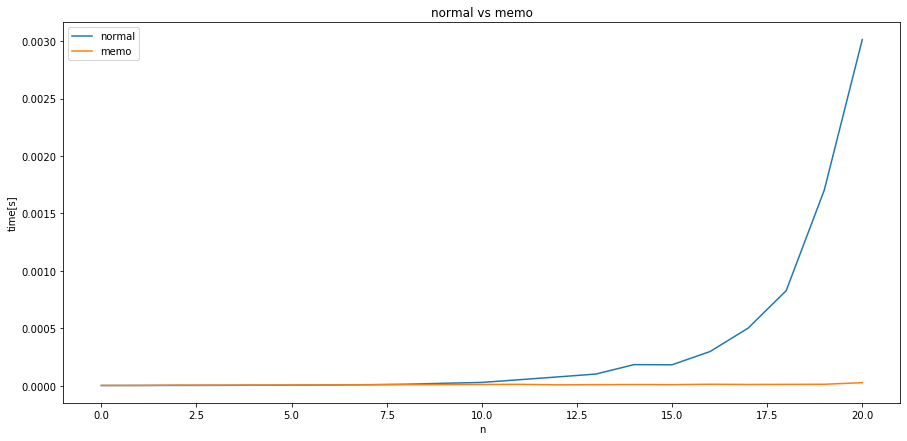

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 7))
plt.plot(n, t_normal, label='normal')
plt.plot(n, t_memo, label='memo')
plt.title('normal vs memo')
plt.xlabel('n')
plt.ylabel('time[s]')
plt.legend()
plt.show()